# Table of Content
1. [Load Data](#first-bullet)
2. [Define Net](#second-bullet)
3. [Getting Noise as Input](#third-bullet)
4. [Learning Rate (Optimizer)](#fourth-bullet)
5. [trial 4](#fifth-bullet)
6. [trial 5](#sixth-bullet)

--------

In [6]:
num_epochs = 100
learning_rate = 0.01
eps = 0.2

#noise variation
#input
sigma = 0.2

#recurrent input noise
sigma2 = 0.01

-------

In [7]:
import torchvision
from matplotlib.pyplot import imshow, pause

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from Functions import *



images = getData('MNIST')
noisy_images = get_noisy_image(images.numpy(),sigma)
noisy_images = np.squeeze(torch.tensor(noisy_images),1)
images = np.squeeze(images,1)

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

--------------
# Load Data <a class="anchor" id="first-bullet"></a>

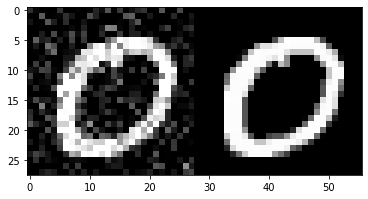

noisy image size:
 torch.Size([1, 28, 28]) 

true image size:
 torch.Size([1, 28, 28])


In [13]:
getPlot([noisy_images,images])
print("noisy image size:\n",noisy_images.shape, "\n")
print("true image size:\n",images.shape)

----------------
# Network <a class="anchor" id="second-bullet"></a>

In [14]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.fn = nn.Linear(28*28,28*28)
        
    def forward(self, x, h):
        x = x.view(-1,28*28)
        h = x.view(-1,28*28)
        h1 = self.fn(x)  
        h2 = self.fn(h)
        h = h1 + h2
        
        f = self.fn(h)
        
        f = f.view(-1,28,28)
        
        return f,h

In [15]:
from torchsummary import summary

In [16]:
class test_RNN(nn.Module):
    def __init__(self):
        super(test_RNN, self).__init__()
        self.fn = nn.Linear(28*28,28*28)
        
    def forward(self, x):
        x = x.view(-1,28*28)
        h = x
        h = self.fn(x) + self.fn(h)
        
        f = self.fn(h)
        
        f = f.view(-1,28,28)
        
        return f

test_net = test_RNN()

In [17]:
summary(test_net,input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 784]         615,440
            Linear-2                  [-1, 784]         615,440
            Linear-3                  [-1, 784]         615,440
Total params: 1,846,320
Trainable params: 1,846,320
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 7.04
Estimated Total Size (MB): 7.06
----------------------------------------------------------------


In [18]:
net = RNN()

----------------
# Noise <a class="anchor" id="third-bullet"></a>

In [19]:
img_noise = np.random.normal(scale=sigma, size=images.shape)

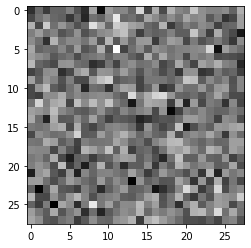

torch.Size([28, 28])

In [20]:
img_noise = np.squeeze(torch.tensor(img_noise))
getPlot([img_noise, img_noise])
img_noise.size()

In [21]:
 h = torch.zeros(images.shape)

----------------
# Opotimizer <a class="anchor" id="fourth-bullet"></a>

In [22]:
criterion = nn.MSELoss()
import torch.optim as optim

In [23]:
optimizer = optim.Adam(net.parameters(),lr=learning_rate)

In [24]:
def train(net,input_img,h,train_img,true_img,optimizer,criterion):
    '''arg:
    
            net: defined network with 2 inputs
            input_img: pure noise image used to feed into our network
            h: initial state
            train_img: corrupted true image or noisy image use as testing 
            true_img: original image without corruption; used for computing loss
            optimizer: optimization method
            criterion: Loss function
    '''
    
    #set stuff to device; GPU if we have one
    net = net.to(device)
    input_img = input_img.to(device)
    h = h.to(device)
    train_img = train_img.to(device)
    
    #network
    out,h = net(input_img.float(),h.float())
    
    #print(out.shape)
    #print(train_img)
    #loss
    loss_true = criterion(out,true_img)
    loss = criterion(out,train_img)
    
    #back and optim
    optimizer.zero_grad()
    loss.backward(retain_graph=True)
    optimizer.step()
    
    return out, loss, loss_true, h

----------------
# Training <a class="anchor" id="fifth-bullet"></a>

Epoch [1/100], Loss vs noisy: 0.2028, loss vs true img: 0.2052
torch.Size([1, 28, 28])


/Users/Alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/Alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


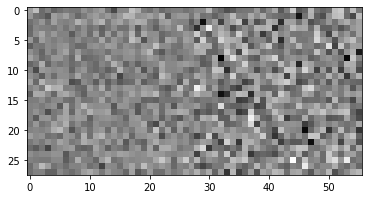

0.2
Epoch [2/100], Loss vs noisy: 0.8929, loss vs true img: 0.8943


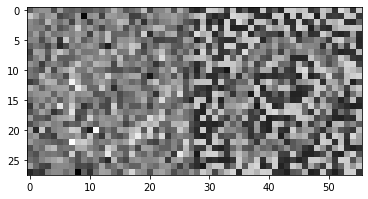

0.2
Epoch [3/100], Loss vs noisy: 33.9205, loss vs true img: 34.1167


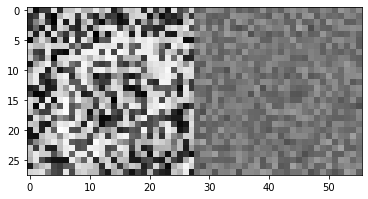

0.2
Epoch [4/100], Loss vs noisy: 0.7590, loss vs true img: 0.8103


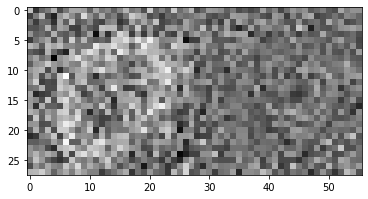

0.2
Epoch [5/100], Loss vs noisy: 0.6064, loss vs true img: 0.6055


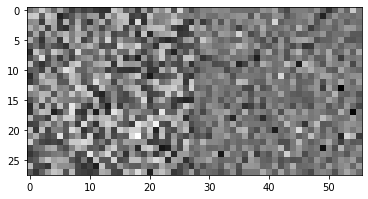

0.2
Epoch [6/100], Loss vs noisy: 0.7222, loss vs true img: 0.7251


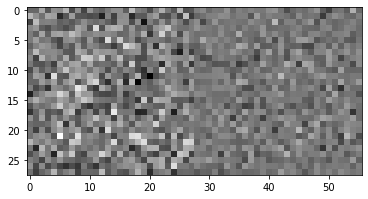

0.2
Epoch [7/100], Loss vs noisy: 1.5043, loss vs true img: 1.5325


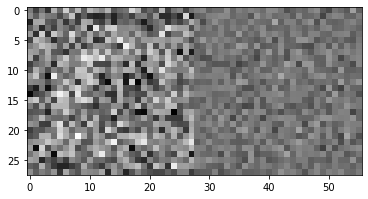

0.2
Epoch [8/100], Loss vs noisy: 2.1302, loss vs true img: 2.1760


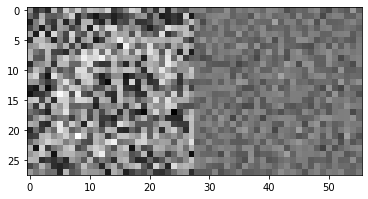

0.2
Epoch [9/100], Loss vs noisy: 1.6923, loss vs true img: 1.7414


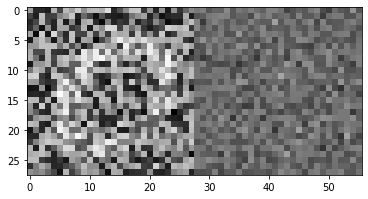

0.2
Epoch [10/100], Loss vs noisy: 0.8437, loss vs true img: 0.8854


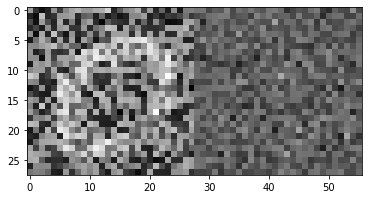

0.2
Epoch [11/100], Loss vs noisy: 0.3385, loss vs true img: 0.3685


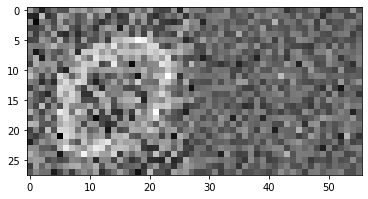

0.2
Epoch [12/100], Loss vs noisy: 0.2742, loss vs true img: 0.2933


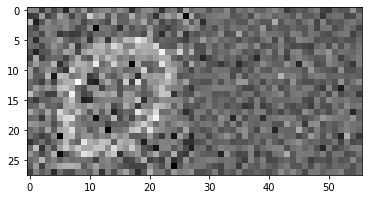

0.2
Epoch [13/100], Loss vs noisy: 0.3780, loss vs true img: 0.3887


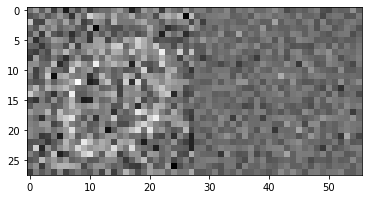

0.2
Epoch [14/100], Loss vs noisy: 0.4542, loss vs true img: 0.4593


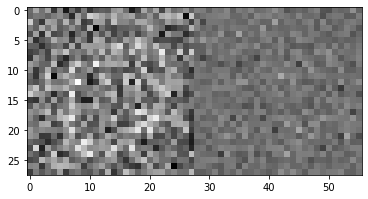

0.2
Epoch [15/100], Loss vs noisy: 0.4467, loss vs true img: 0.4488


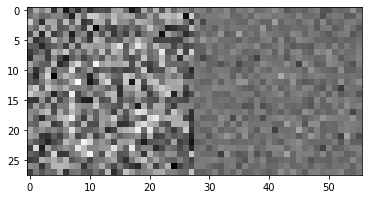

0.2
Epoch [16/100], Loss vs noisy: 0.3491, loss vs true img: 0.3513


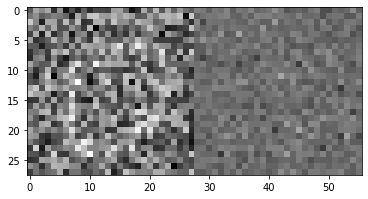

0.2
Epoch [17/100], Loss vs noisy: 0.2549, loss vs true img: 0.2575


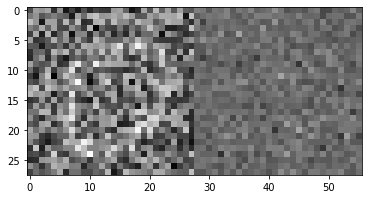

0.2
Epoch [18/100], Loss vs noisy: 0.1579, loss vs true img: 0.1624


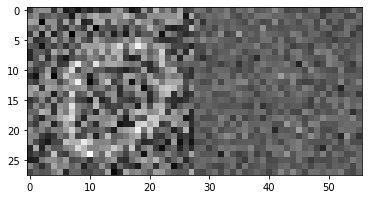

0.2
Epoch [19/100], Loss vs noisy: 0.0989, loss vs true img: 0.1054


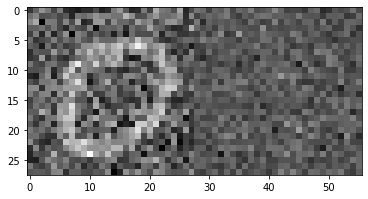

0.2
Epoch [20/100], Loss vs noisy: 0.0679, loss vs true img: 0.0769


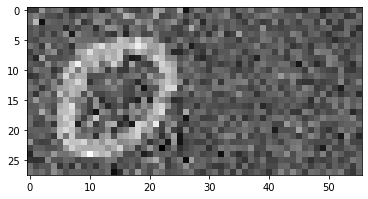

0.2
Epoch [21/100], Loss vs noisy: 0.0617, loss vs true img: 0.0737


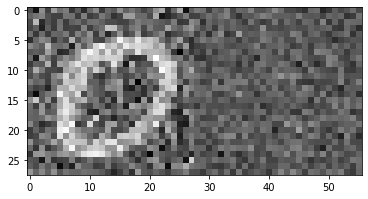

0.2
Epoch [22/100], Loss vs noisy: 0.0787, loss vs true img: 0.0939


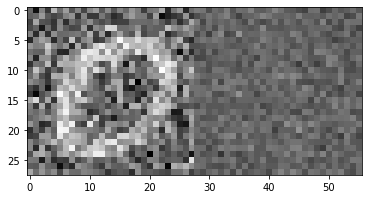

0.2
Epoch [23/100], Loss vs noisy: 0.1034, loss vs true img: 0.1217


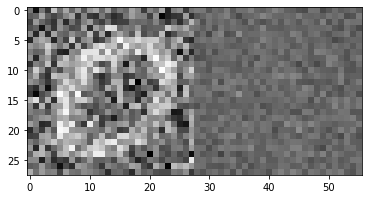

0.2
Epoch [24/100], Loss vs noisy: 0.1270, loss vs true img: 0.1479


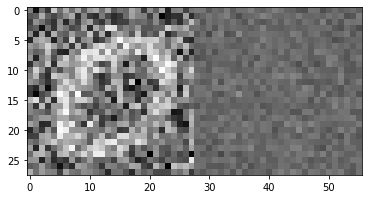

0.2
Epoch [25/100], Loss vs noisy: 0.1459, loss vs true img: 0.1686


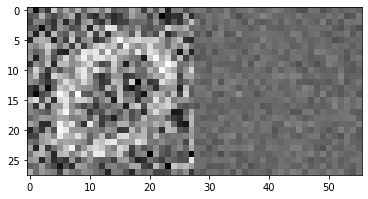

0.2
Epoch [26/100], Loss vs noisy: 0.1364, loss vs true img: 0.1600


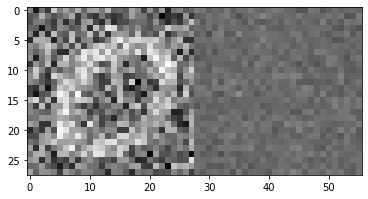

0.2
Epoch [27/100], Loss vs noisy: 0.1217, loss vs true img: 0.1452


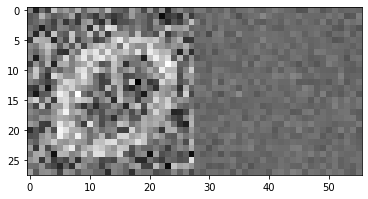

0.2
Epoch [28/100], Loss vs noisy: 0.0975, loss vs true img: 0.1207


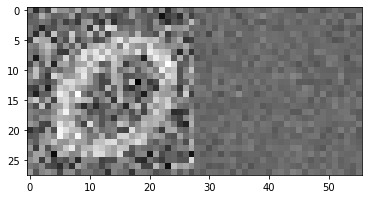

0.2
Epoch [29/100], Loss vs noisy: 0.0700, loss vs true img: 0.0917


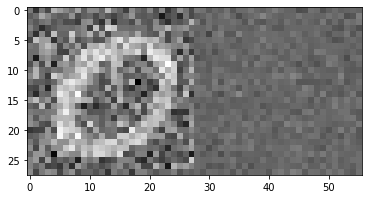

0.2
Epoch [30/100], Loss vs noisy: 0.0513, loss vs true img: 0.0717


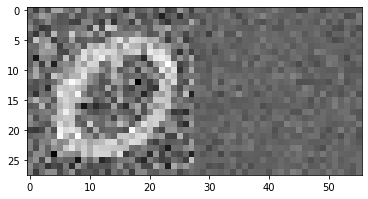

0.2
Epoch [31/100], Loss vs noisy: 0.0397, loss vs true img: 0.0594


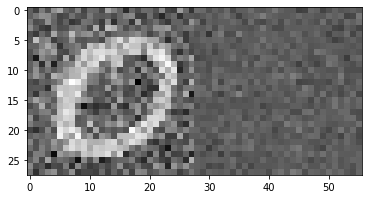

0.2
Epoch [32/100], Loss vs noisy: 0.0378, loss vs true img: 0.0563


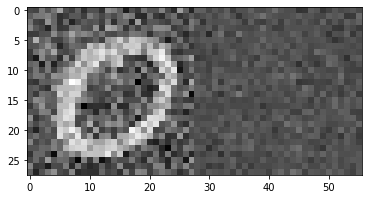

0.2
Epoch [33/100], Loss vs noisy: 0.0441, loss vs true img: 0.0612


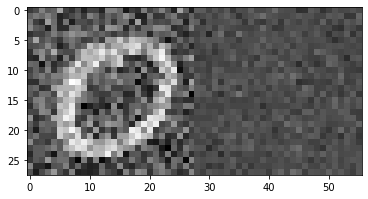

0.2
Epoch [34/100], Loss vs noisy: 0.0462, loss vs true img: 0.0624


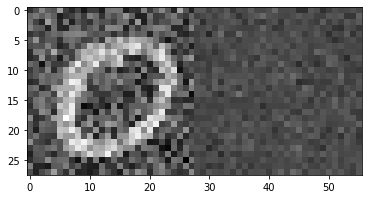

0.2
Epoch [35/100], Loss vs noisy: 0.0396, loss vs true img: 0.0567


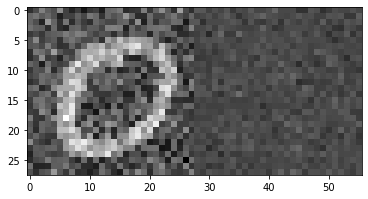

0.2
Epoch [36/100], Loss vs noisy: 0.0376, loss vs true img: 0.0554


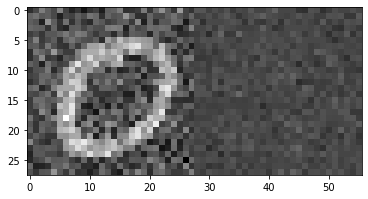

0.2
Epoch [37/100], Loss vs noisy: 0.0341, loss vs true img: 0.0526


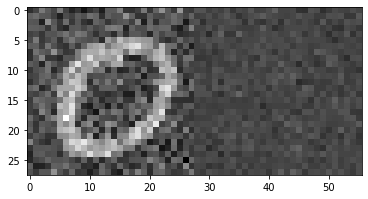

0.2
Epoch [38/100], Loss vs noisy: 0.0271, loss vs true img: 0.0471


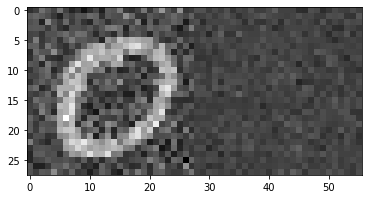

0.2
Epoch [39/100], Loss vs noisy: 0.0194, loss vs true img: 0.0410


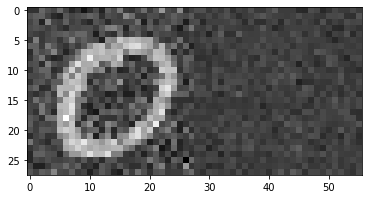

0.2
Epoch [40/100], Loss vs noisy: 0.0156, loss vs true img: 0.0393


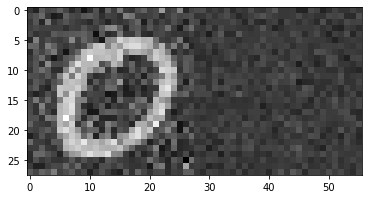

0.2
Epoch [41/100], Loss vs noisy: 0.0143, loss vs true img: 0.0395


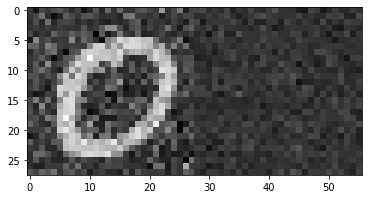

0.2
Epoch [42/100], Loss vs noisy: 0.0211, loss vs true img: 0.0485


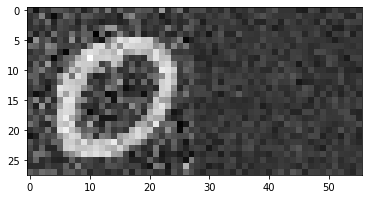

0.2
Epoch [43/100], Loss vs noisy: 0.0160, loss vs true img: 0.0432


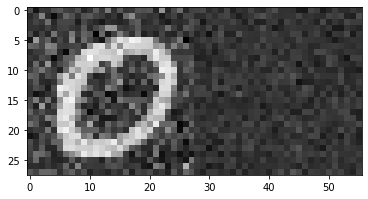

0.2
Epoch [44/100], Loss vs noisy: 0.0138, loss vs true img: 0.0409


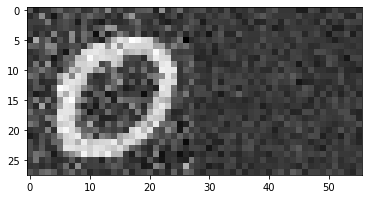

0.2
Epoch [45/100], Loss vs noisy: 0.0158, loss vs true img: 0.0432


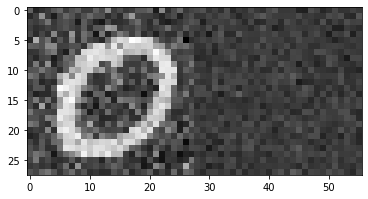

0.2
Epoch [46/100], Loss vs noisy: 0.0116, loss vs true img: 0.0375


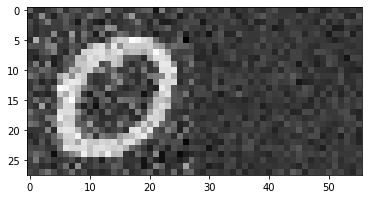

0.2
Epoch [47/100], Loss vs noisy: 0.0093, loss vs true img: 0.0338


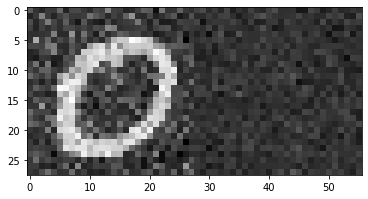

0.2
Epoch [48/100], Loss vs noisy: 0.0071, loss vs true img: 0.0300


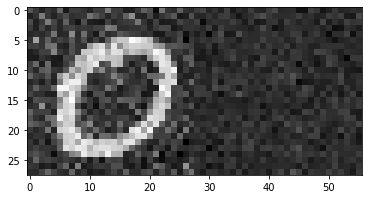

0.2
Epoch [49/100], Loss vs noisy: 0.0061, loss vs true img: 0.0290


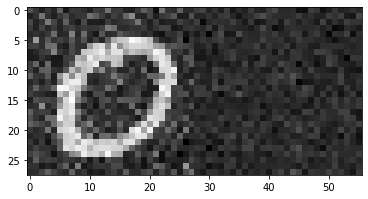

0.2
Epoch [50/100], Loss vs noisy: 0.0059, loss vs true img: 0.0268


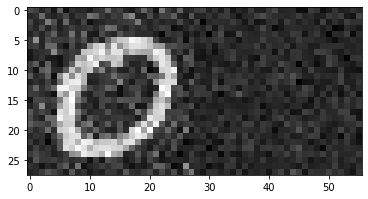

0.2
Epoch [51/100], Loss vs noisy: 0.0044, loss vs true img: 0.0250


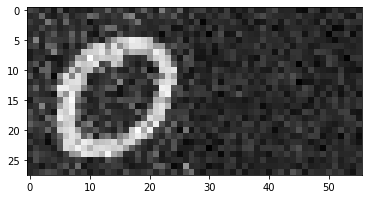

0.2
Epoch [52/100], Loss vs noisy: 0.0043, loss vs true img: 0.0249


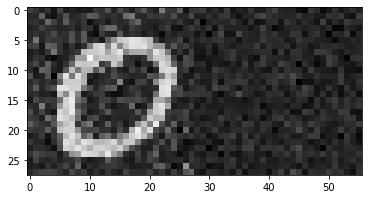

0.2
Epoch [53/100], Loss vs noisy: 0.0042, loss vs true img: 0.0236


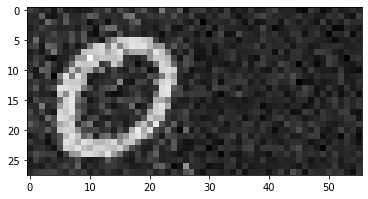

0.2
Epoch [54/100], Loss vs noisy: 0.0052, loss vs true img: 0.0236


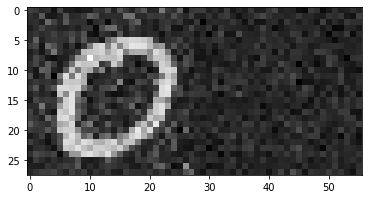

0.2
Epoch [55/100], Loss vs noisy: 0.0050, loss vs true img: 0.0229


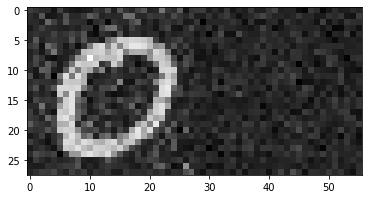

0.2
Epoch [56/100], Loss vs noisy: 0.0033, loss vs true img: 0.0215


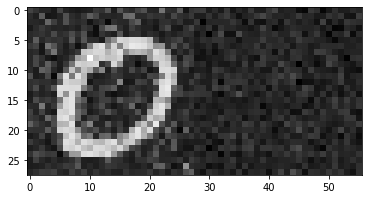

0.2
Epoch [57/100], Loss vs noisy: 0.0027, loss vs true img: 0.0207


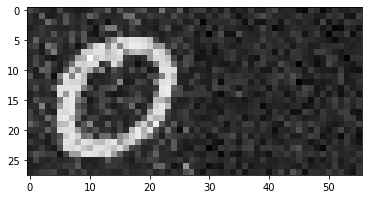

0.2
Epoch [58/100], Loss vs noisy: 0.0016, loss vs true img: 0.0203


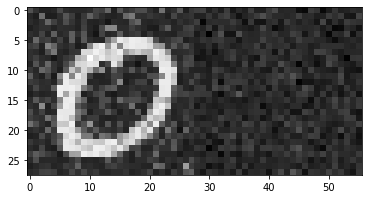

0.2
Epoch [59/100], Loss vs noisy: 0.0015, loss vs true img: 0.0204


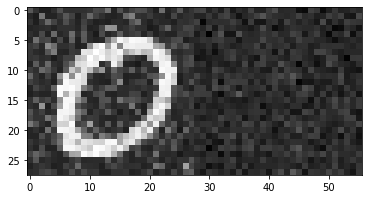

0.2
Epoch [60/100], Loss vs noisy: 0.0019, loss vs true img: 0.0206


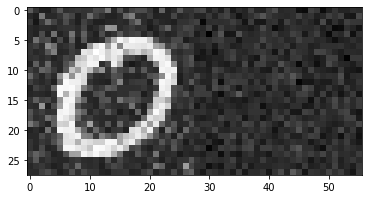

0.2
Epoch [61/100], Loss vs noisy: 0.0038, loss vs true img: 0.0241


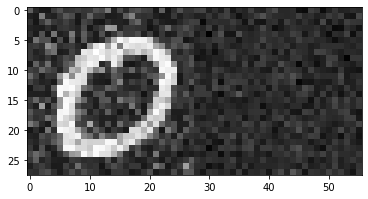

0.2
Epoch [62/100], Loss vs noisy: 0.0035, loss vs true img: 0.0238


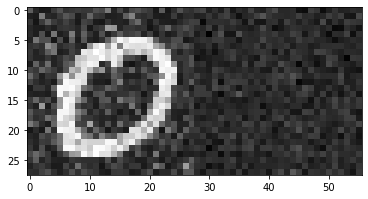

0.2
Epoch [63/100], Loss vs noisy: 0.0046, loss vs true img: 0.0256


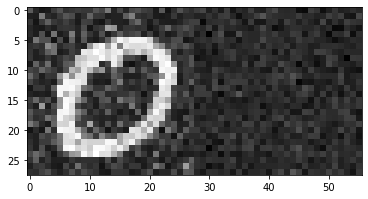

0.2
Epoch [64/100], Loss vs noisy: 0.0020, loss vs true img: 0.0217


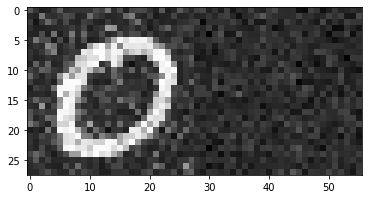

0.2
Epoch [65/100], Loss vs noisy: 0.0019, loss vs true img: 0.0202


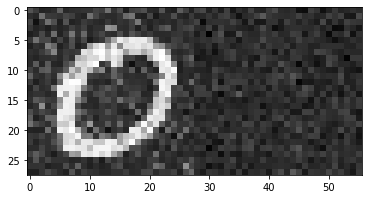

0.2
Epoch [66/100], Loss vs noisy: 0.0023, loss vs true img: 0.0201


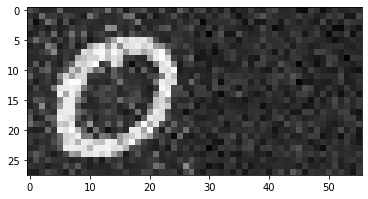

0.2
Epoch [67/100], Loss vs noisy: 0.0013, loss vs true img: 0.0195


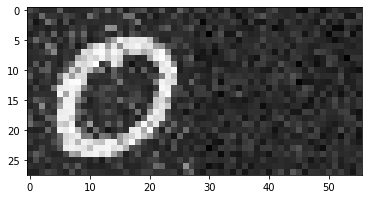

0.2
Epoch [68/100], Loss vs noisy: 0.0015, loss vs true img: 0.0193


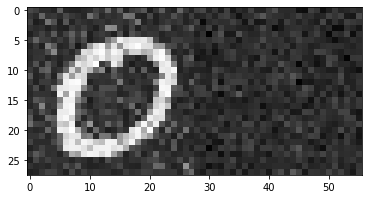

0.2
Epoch [69/100], Loss vs noisy: 0.0020, loss vs true img: 0.0200


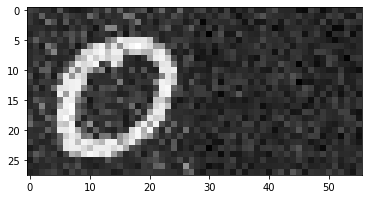

0.2
Epoch [70/100], Loss vs noisy: 0.0019, loss vs true img: 0.0199


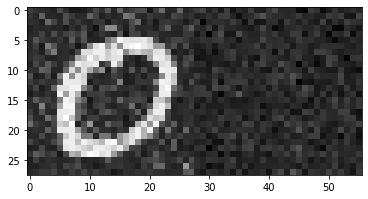

0.2
Epoch [71/100], Loss vs noisy: 0.0020, loss vs true img: 0.0201


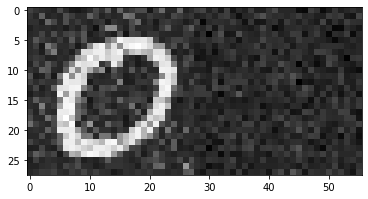

0.2
Epoch [72/100], Loss vs noisy: 0.0018, loss vs true img: 0.0201


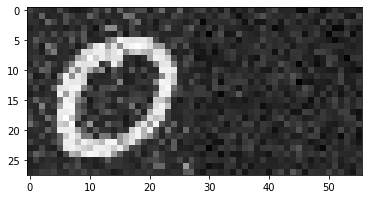

0.2
Epoch [73/100], Loss vs noisy: 0.0013, loss vs true img: 0.0198


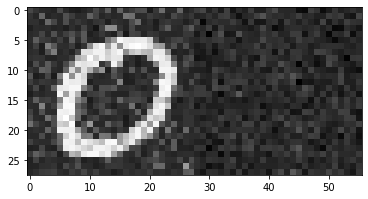

0.2
Epoch [74/100], Loss vs noisy: 0.0015, loss vs true img: 0.0205


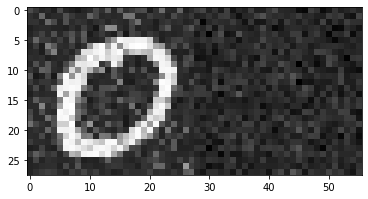

0.2
Epoch [75/100], Loss vs noisy: 0.0011, loss vs true img: 0.0208


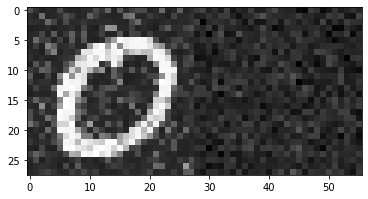

0.2
Epoch [76/100], Loss vs noisy: 0.0006, loss vs true img: 0.0198


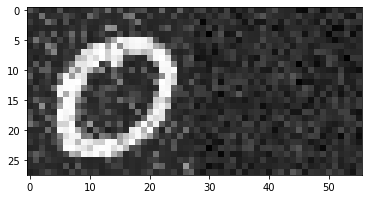

0.2
Epoch [77/100], Loss vs noisy: 0.0007, loss vs true img: 0.0201


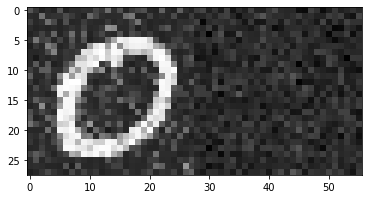

0.2
Epoch [78/100], Loss vs noisy: 0.0010, loss vs true img: 0.0204


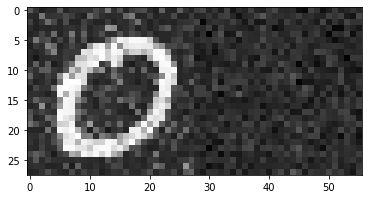

0.2
Epoch [79/100], Loss vs noisy: 0.0010, loss vs true img: 0.0199


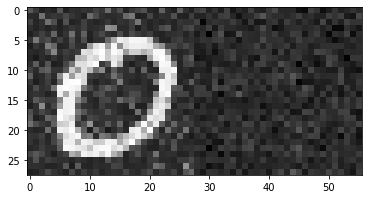

0.2
Epoch [80/100], Loss vs noisy: 0.0009, loss vs true img: 0.0207


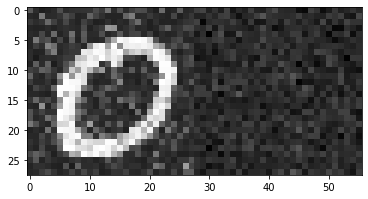

0.2
Epoch [81/100], Loss vs noisy: 0.0005, loss vs true img: 0.0197


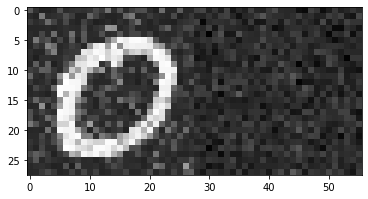

0.2
Epoch [82/100], Loss vs noisy: 0.0008, loss vs true img: 0.0206


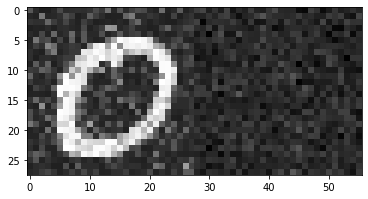

0.2
Epoch [83/100], Loss vs noisy: 0.0021, loss vs true img: 0.0224


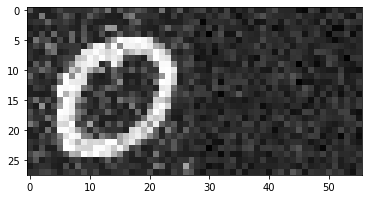

0.2
Epoch [84/100], Loss vs noisy: 0.0020, loss vs true img: 0.0222


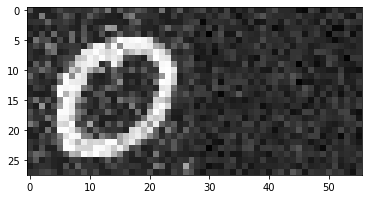

0.2
Epoch [85/100], Loss vs noisy: 0.0023, loss vs true img: 0.0227


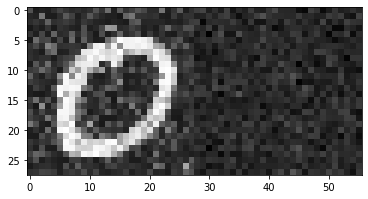

0.2
Epoch [86/100], Loss vs noisy: 0.0006, loss vs true img: 0.0201


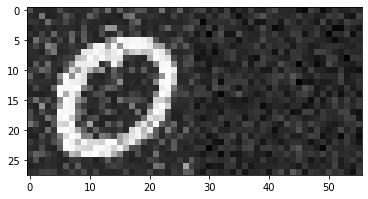

0.2
Epoch [87/100], Loss vs noisy: 0.0005, loss vs true img: 0.0192


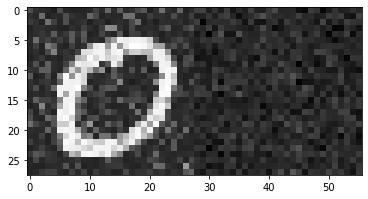

0.2
Epoch [88/100], Loss vs noisy: 0.0014, loss vs true img: 0.0194


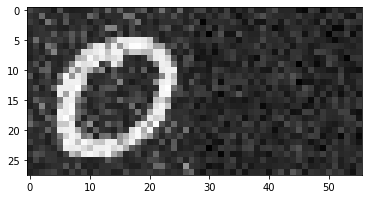

0.2
Epoch [89/100], Loss vs noisy: 0.0026, loss vs true img: 0.0200


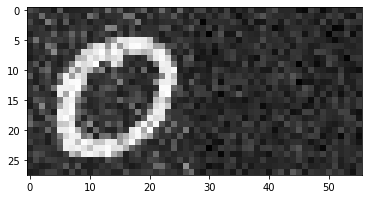

0.2
Epoch [90/100], Loss vs noisy: 0.0018, loss vs true img: 0.0198


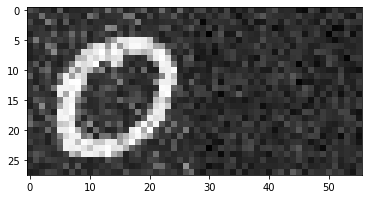

0.2
Epoch [91/100], Loss vs noisy: 0.0056, loss vs true img: 0.0225


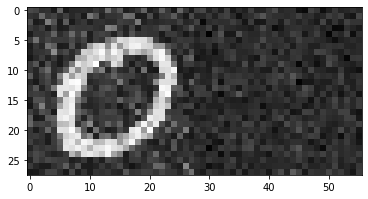

0.2
Epoch [92/100], Loss vs noisy: 0.0027, loss vs true img: 0.0203


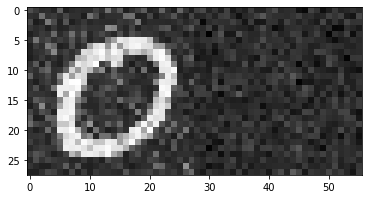

0.2
Epoch [93/100], Loss vs noisy: 0.0007, loss vs true img: 0.0195


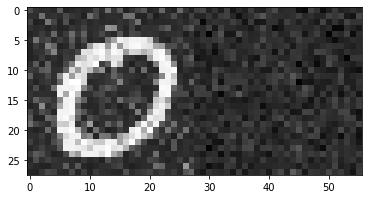

0.2
Epoch [94/100], Loss vs noisy: 0.0002, loss vs true img: 0.0197


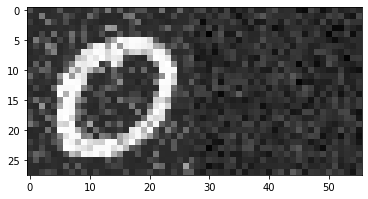

0.2
Epoch [95/100], Loss vs noisy: 0.0014, loss vs true img: 0.0217


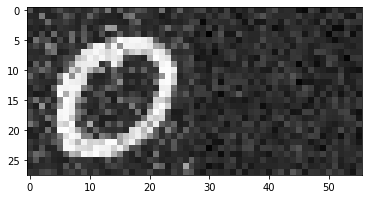

0.2
Epoch [96/100], Loss vs noisy: 0.0014, loss vs true img: 0.0214


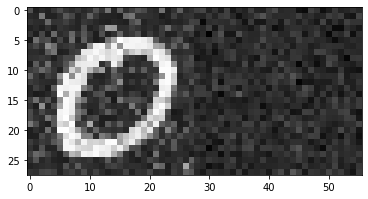

0.2
Epoch [97/100], Loss vs noisy: 0.0003, loss vs true img: 0.0203


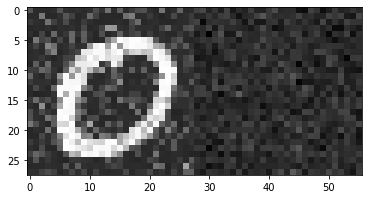

0.2
Epoch [98/100], Loss vs noisy: 0.0005, loss vs true img: 0.0208


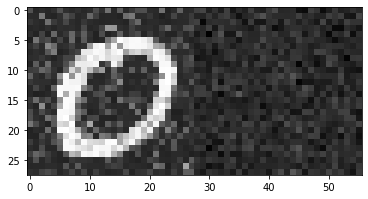

0.2
Epoch [99/100], Loss vs noisy: 0.0016, loss vs true img: 0.0228


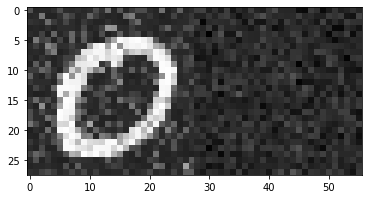

0.2
Epoch [100/100], Loss vs noisy: 0.0015, loss vs true img: 0.0226


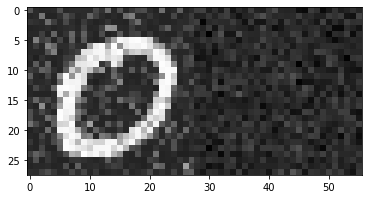

In [25]:

for epoch in range(num_epochs):
    
    if epoch != 0:
        
        #img_noise = (1-eps)*img_noise + eps*out.double()
        
        #generate noise
        noise_add = torch.tensor(np.random.normal(scale=sigma2, size=images.shape))
        img_noise = (1-eps)*img_noise + eps*noise_add
        print(eps)
    
    loss = 0
    loss_true = 0
    
    out, loss, loss_true, h = train(net,img_noise,h,noisy_images,images,optimizer,criterion)
    
    print('Epoch [{}/{}], Loss vs noisy: {:.4f}, loss vs true img: {:.4f}'.format(epoch+1,num_epochs,loss,loss_true))
    
    if img_noise.size(0) != 1:
        image_noise = torch.tensor(img_noise).unsqueeze(0)
        print(image_noise.size())
    
    state = h.view(-1,28,28)
    
    getPlot([torch.tensor(out),torch.tensor(state.float())])

In [18]:
LossA = criterion(out,images)
print(LossA)

tensor(5.1215, grad_fn=<MseLossBackward>)


/Users/Alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


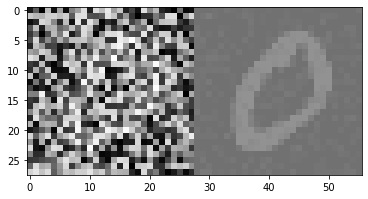

In [19]:
getPlot([torch.tensor(out),noisy_images.float()])

In [25]:
print(h.size())

torch.Size([1, 784])
